In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#читаємо файл
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#напишіть функцію гіпотези лінійної регресії у векторному вигляді;
$$
h( x )=w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3+w_4 x_4
$$
$$
h(x) = w^{T}x
$$

In [2]:
df = df[['price', 'area', 'bedrooms', 'bathrooms']]
df.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [3]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#нормалізований датафрейм
df_normalized

,price,area,bedrooms,bathrooms
0,1.000000,0.396564,0.6,0.333333
1,0.909091,0.502405,0.6,1.000000
2,0.909091,0.571134,0.4,0.333333
3,0.906061,0.402062,0.6,0.333333
4,0.836364,0.396564,0.6,0.000000
...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000
541,0.001485,0.051546,0.4,0.000000
542,0.000000,0.135395,0.2,0.000000
543,0.000000,0.086598,0.4,0.000000


Initial loss: 0.998165137614679
Final weights: [[1.01676058e-16]
 [3.04605680e-01]
 [1.67567698e-01]
 [2.73781975e-01]]
[1.01676058e-16]  - вільний член регресії
[0.30460568]  - ваги , які відповідають площі
[0.1675677]  - ваги , які відповідають кількості спалень
[0.27378198]  - ваги , які які відповідають ванних кімнат
Final loss: 0.5442090970612876


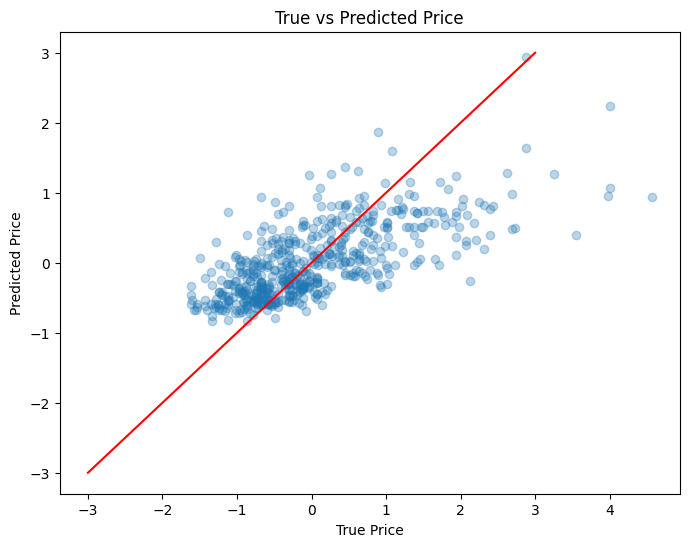

In [4]:


def linear_regression_hypothesis(X, w):
    """Compute the hypothesis for linear regression."""
    return np.dot(X, w)
#створіть функцію для обчислення функції втрат у векторному вигляді
def compute_linear_regression_loss(X, y, w):
    """Compute the loss for linear regression."""
    y_pred = linear_regression_hypothesis(X, w)
    return ((y_pred - y) ** 2).mean()


df_normalized = (df_normalized - df_normalized.mean()) / df_normalized.std()


y = df_normalized.price.values.reshape(-1, 1)
X = df_normalized.drop('price', axis=1).values
X = np.hstack([np.ones([X.shape[0], 1]), X])
w = np.zeros((X.shape[1], 1))

# Compute initial loss
initial_loss = compute_linear_regression_loss(X, y, w)
print(f"Initial loss: {initial_loss}")
#rate навчання 
alpha = 0.01

#кількість ітерацій навчання
num_iterations = 100

#реалізуйте один крок градієнтного спуску
for i in range(num_iterations):
    # Compute predictions
    predictions = np.dot(X, w)

    # Compute error
    error = predictions - y

    # Update weights
    w = w - alpha * (1.0/len(y)) * np.dot(X.T, error)

print("Final weights:", w)
print(w[0]," - вільний член регресії")
print(w[1]," - ваги , які відповідають площі")
print(w[2]," - ваги , які відповідають кількості спалень")
print(w[3]," - ваги , які які відповідають ванних кімнат")


final_loss = compute_linear_regression_loss(X, y, w)
print(f"Final loss: {final_loss}")


plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.3)
plt.plot([-3, 3], [-3, 3], color='red')  # a y=x line, since we've standardized the variables
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True vs Predicted Price')
plt.show()

In [5]:

X = df_normalized[['area', 'bedrooms', 'bathrooms']].values
y = df_normalized['price'].values


X = np.hstack((np.ones((X.shape[0], 1)), X))


w = np.linalg.inv(X.T @ X) @ X.T @ y

w
print(w[0]," - вільний член регресії")
print(w[1]," - ваги , які відповідають площі")
print(w[2]," - ваги , які відповідають кількості спалень")
print(w[3]," - ваги , які які відповідають ванних кімнат")

-3.478120569333498e-16  - вільний член регресії
0.4394520852064685  - ваги , які відповідають площі
0.16052865976899797  - ваги , які відповідають кількості спалень
0.3723444227527315  - ваги , які які відповідають ванних кімнат


Initial loss: 0.998165137614679
Final weights: [[1.01676058e-16]
 [3.04605680e-01]
 [1.67567698e-01]
 [2.73781975e-01]]
Final loss: 0.5442090970612876


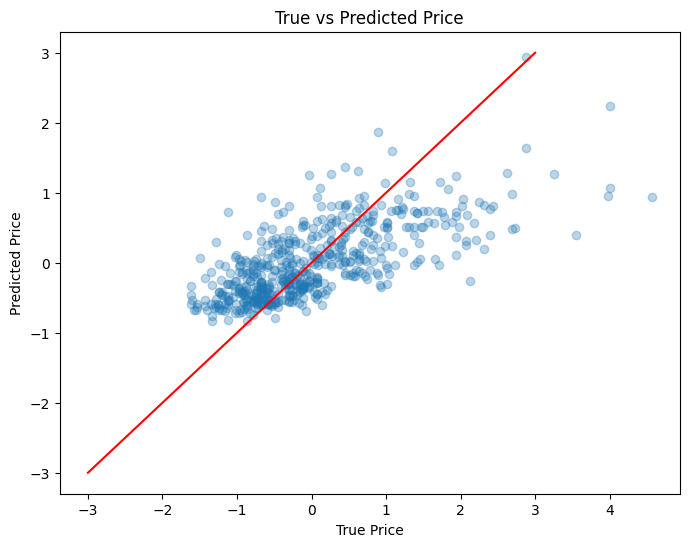

In [4]:


def linear_regression_hypothesis(X, w):
    """Compute the hypothesis for linear regression."""
    return np.dot(X, w)
#створіть функцію для обчислення функції втрат у векторному вигляді
def compute_linear_regression_loss(X, y, w):
    """Compute the loss for linear regression."""
    y_pred = linear_regression_hypothesis(X, w)
    return ((y_pred - y) ** 2).mean()
df_normalized = (df_normalized - df_normalized.mean()) / df_normalized.std()


y = df_normalized.price.values.reshape(-1, 1)
X = df_normalized.drop('price', axis=1).values
X = np.hstack([np.ones([X.shape[0], 1]), X])
w = np.zeros((X.shape[1], 1))

# Compute initial loss
initial_loss = compute_linear_regression_loss(X, y, w)
print(f"Initial loss: {initial_loss}")
#rate навчання 
alpha = 0.01

#кількість ітерацій навчання
num_iterations = 100

#реалізуйте один крок градієнтного спуску
for i in range(num_iterations):
    # Compute predictions
    predictions = np.dot(X, w)

    # Compute error
    error = predictions - y

    # Update weights
    w = w - alpha * (1.0/len(y)) * np.dot(X.T, error)


print("Final weights:", w)

final_loss = compute_linear_regression_loss(X, y, w)
print(f"Final loss: {final_loss}")


plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, alpha=0.3)
plt.plot([-3, 3], [-3, 3], color='red')  # a y=x line, since we've standardized the variables
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('True vs Predicted Price')
plt.show()

In [6]:
y = y.reshape(-1,1)
loss = compute_linear_regression_loss(X, y, w)
print("Loss for the analytical solution:", loss)

Loss for the analytical solution: 1.4843544739229295


Втрати внаслідок регресії виявилися меншими, ніж отримані через аналітичне рішення. Тобто, доцільніше використовувати регресію  ,якщо потрібно отримати точніші результати.